# 🏦 Capstone Project: Predicting Price Moves with News Sentiment


# Environment Check (Dev Setup Validation)

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

sns.set_style("whitegrid")

Python version: 3.14.3 (tags/v3.14.3:323c59a, Feb  3 2026, 16:04:56) [MSC v.1944 64 bit (AMD64)]
Pandas version: 2.3.3
NumPy version: 2.4.2


# Load Dataset

In [3]:
news = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=["date"])
news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Basic Data Overview

In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [4]:
news.describe(include="all")

,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN


# DESCRIPTIVE STATISTICS

# Headline Length Analysis

Average headline length: 73.12
Median headline length: 64.0


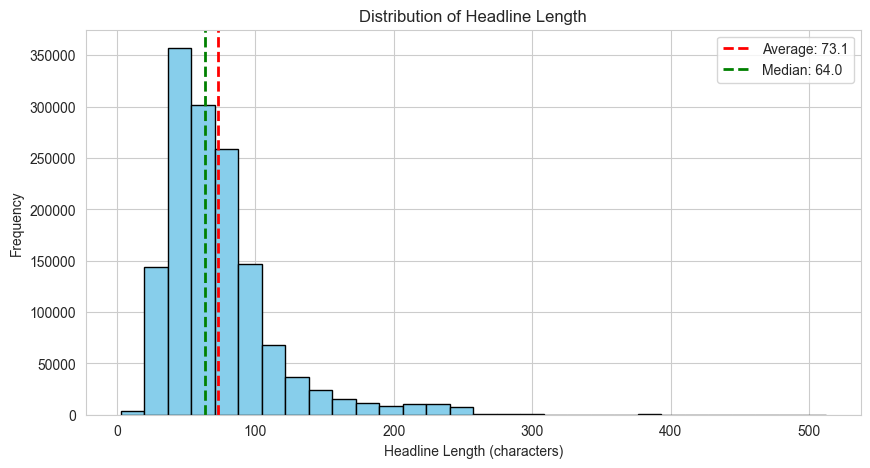

In [24]:
news["headline_length"] = news["headline"].apply(len)

avg_length = news["headline_length"].mean()
median_length = news["headline_length"].median()

print("Average headline length:", round(avg_length, 2))
print("Median headline length:", median_length)

plt.figure(figsize=(10,5))
counts, bins, patches = plt.hist(news["headline_length"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Headline Length")
plt.xlabel("Headline Length (characters)")
plt.ylabel("Frequency")

# Add vertical lines for mean and median
plt.axvline(avg_length, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_length:.1f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.legend()
plt.show()

# Headline Length Distribution

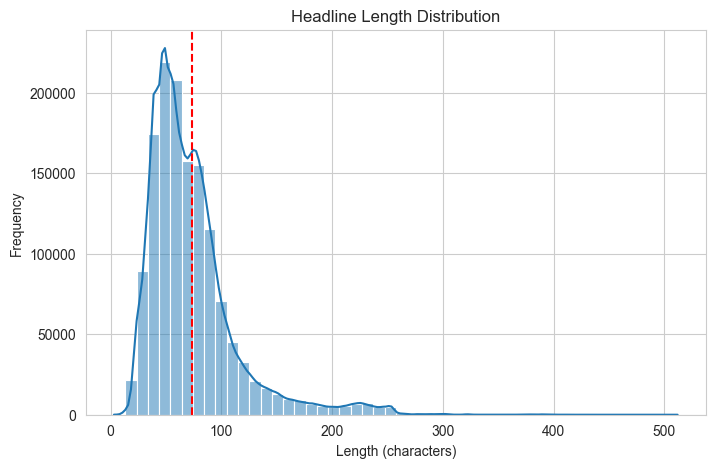

Mean: 73.12051490484095
Median: 64.0


In [6]:
news['headline_length'] = news['headline'].str.len()

plt.figure(figsize=(8,5))
sns.histplot(news['headline_length'], bins=50, kde=True)
plt.axvline(news['headline_length'].mean(), color='red', linestyle='--')
plt.title("Headline Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.show()

print("Mean:", news['headline_length'].mean())
print("Median:", news['headline_length'].median())


# Articles Per Publisher

In [9]:
publisher_counts = news["publisher"].value_counts()

print("Top 10 Publishers:")
publisher_counts.head(10)

Top 10 Publishers:


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

# Publisher Bar Chart

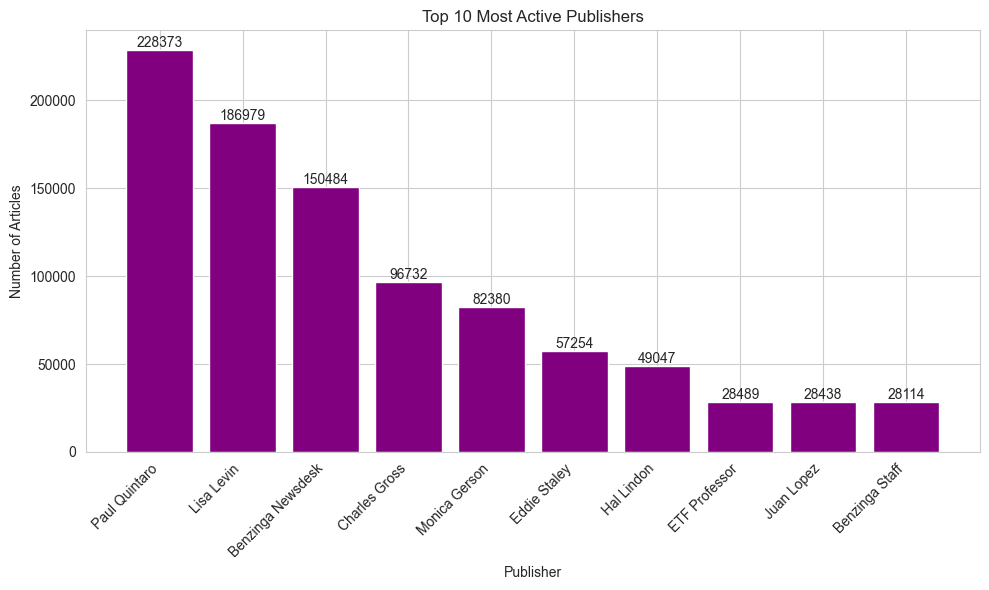

In [23]:
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(top_publishers.index, top_publishers.values, color='purple')
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45, ha='right')

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# TIME SERIES ANALYSIS

# Publication Frequency Over Time

In [7]:
news["date"] = pd.to_datetime(news["date"], errors="coerce")
news["date_only"] = news["date"].dt.date
print(news["date"].dtype)
print(news["date_only"].head())

datetime64[ns, UTC-04:00]
0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: date_only, dtype: object


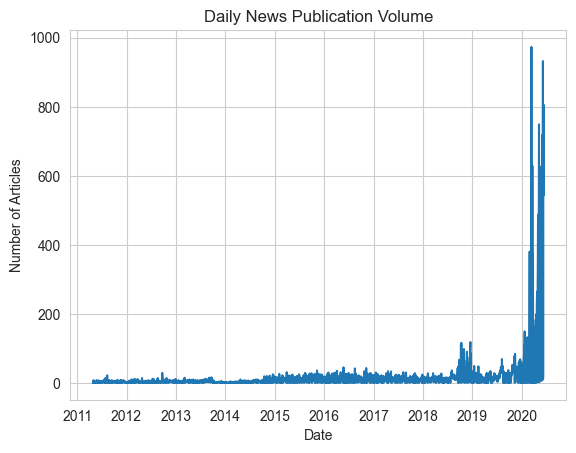

In [16]:
news["date_only"] = news["date"].dt.date
daily_counts = news.groupby("date_only").size()

plt.figure()
daily_counts.plot()
plt.title("Daily News Publication Volume")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


# Articles by Day of Week

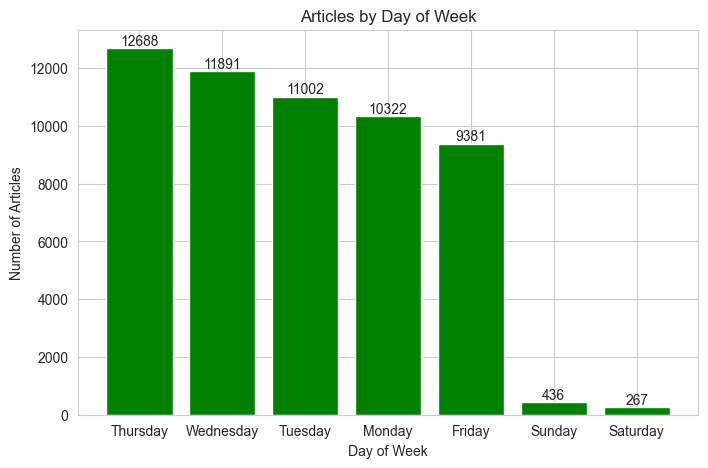

In [20]:
news["day_of_week"] = news["date"].dt.day_name()

dow_counts = news["day_of_week"].value_counts()

plt.figure(figsize=(8,5))
bars = plt.bar(dow_counts.index, dow_counts.values, color='green')
plt.title("Articles by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Articles")

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.show()

# Publishing Hour Analysis

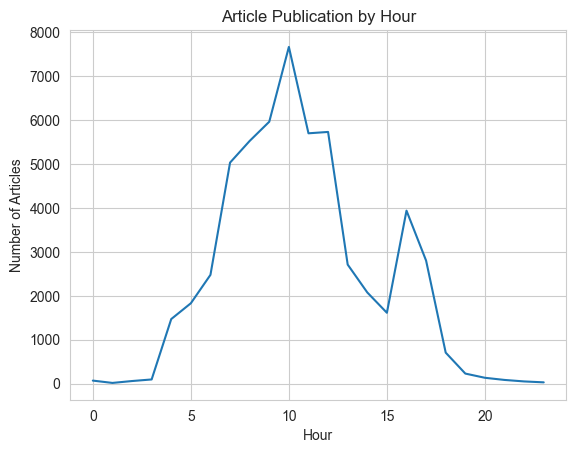

In [25]:
news["hour"] = news["date"].dt.hour
hour_counts = news["hour"].value_counts().sort_index()

plt.figure()
hour_counts.plot()
plt.title("Article Publication by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()

# TEXT ANALYSIS (KEYWORD EXTRACTION)

## Clean Headlines

In [26]:
import re
from collections import Counter

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

news["clean_headline"] = news["headline"].astype(str).apply(clean_text)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert headlines to lowercase and remove basic punctuation
clean_headlines = news['headline'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Use CountVectorizer to extract bigrams (2-word phrases)
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(clean_headlines)

# Sum up the counts of each bigram
bigram_counts = X.sum(axis=0)
bigrams_freq = [(phrase, bigram_counts[0, idx]) for phrase, idx in vectorizer.vocabulary_.items()]

# Get top 20 most common bigrams
top_bigrams = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)[:20]

# Display results
print("Top 20 Most Frequent 2-Word Phrases:")
for phrase, count in top_bigrams:
    print(f"{phrase}: {count}")


Top 20 Most Frequent 2-Word Phrases:
price target: 47266
stocks moving: 40072
market update: 33089
earnings scheduled: 32055
initiates coverage: 28980
raises pt: 27206
companies trading: 23170
trading higher: 22154
adj eps: 21690
premarket session: 21670
vs est: 21449
benzingas upgrades: 21115
q1 eps: 20704
q2 eps: 20258
q3 eps: 20043
stocks hit: 20030
hit 52week: 19965
trading lower: 19895
q4 eps: 19846
new 52week: 19070


## Most Common Words

In [27]:
all_words = " ".join(news["clean_headline"]).split()
common_words = Counter(all_words).most_common(20)
common_words

[('to', 402906),
 ('of', 269814),
 ('on', 245082),
 ('for', 239535),
 ('in', 220612),
 ('the', 212863),
 ('m', 186060),
 ('vs', 162147),
 ('stocks', 161868),
 ('q', 157878),
 ('est', 140606),
 ('eps', 128929),
 ('from', 120713),
 ('shares', 114209),
 ('and', 113439),
 ('reports', 108707),
 ('update', 91680),
 ('market', 90880),
 ('earnings', 87185),
 ('with', 84204)]

## Common Keywords Visualization

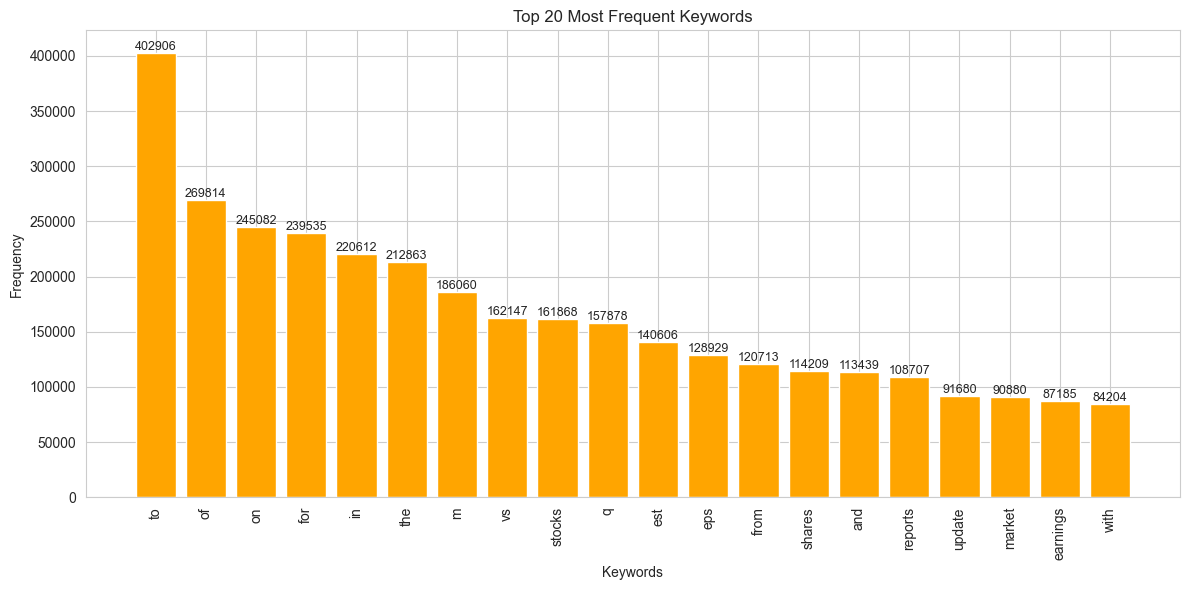

In [29]:
words, counts = zip(*common_words)

plt.figure(figsize=(12,6))
bars = plt.bar(words, counts, color='orange')
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Keywords")
plt.xlabel("Keywords")
plt.ylabel("Frequency")

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Top 20 Bigrams (2-Word Phrases)

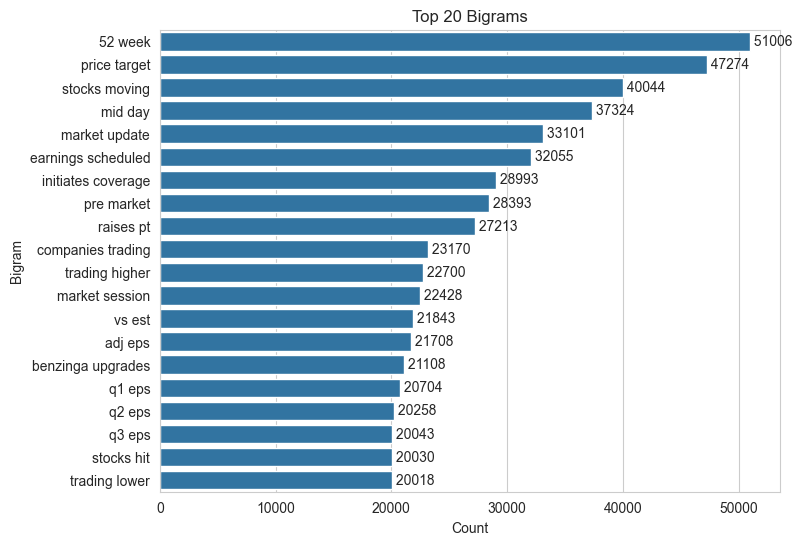

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(news['headline'])

bigram_counts = np.sum(X, axis=0)
bigrams = [(word, bigram_counts[0, idx]) 
           for word, idx in vectorizer.vocabulary_.items()]

bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:20]

bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])

plt.figure(figsize=(8,6))
ax = sns.barplot(data=bigram_df, x='Count', y='Bigram')

plt.title("Top 20 Bigrams")

# Add labels
for i, value in enumerate(bigram_df['Count']):
    ax.text(value, i, f" {int(value)}", va='center')

plt.show()

# TF-IDF Important Words

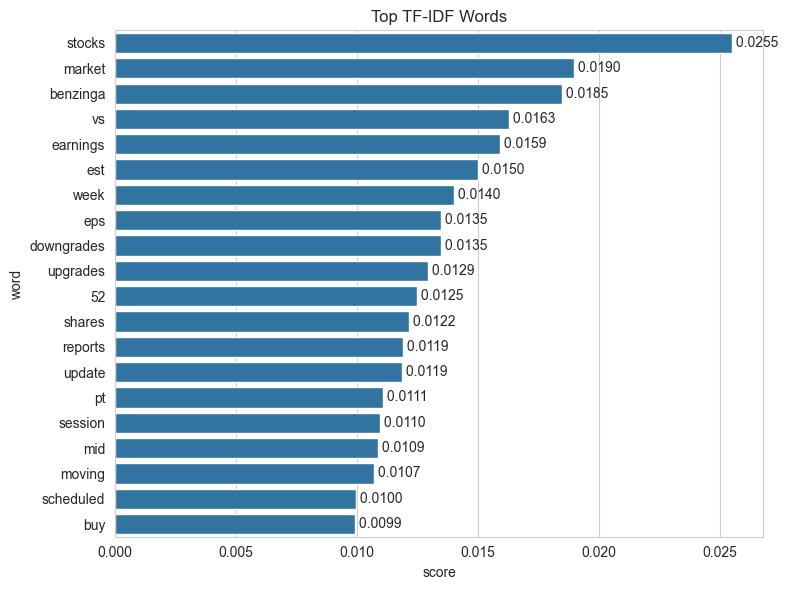

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(news['headline'])

mean_tfidf = np.asarray(X_tfidf.mean(axis=0)).flatten()
words = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame({'word': words, 'score': mean_tfidf})
top_tfidf = tfidf_df.sort_values(by='score', ascending=False).head(20)

plt.figure(figsize=(8,6))
ax = sns.barplot(data=top_tfidf, x='score', y='word')

plt.title("Top TF-IDF Words")

# Add labels to each bar
for i, value in enumerate(top_tfidf['score']):
    ax.text(value, i, f" {value:.4f}", va='center')

plt.tight_layout()
plt.show()


# Basic Sentiment Analysis (VADER)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


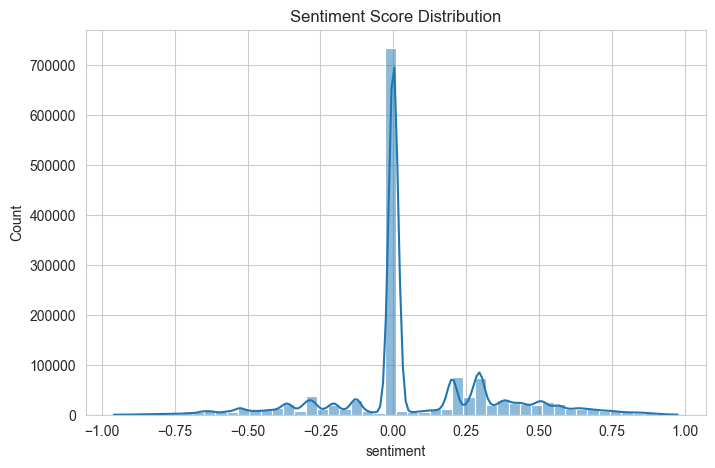

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
news['sentiment'] = news['headline'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

plt.figure(figsize=(8,5))
sns.histplot(news['sentiment'], bins=50, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()

## Financial Event Keywords Detection

In [30]:
keywords = ["fda", "approval", "earnings", "price target", "upgrade",
            "downgrade", "acquisition", "merger", "guidance"]

for word in keywords:
    count = news["clean_headline"].str.contains(word).sum()
    print(f"{word}: {count}")

fda: 12149
approval: 5880
earnings: 86626
price target: 47634
upgrade: 62091
downgrade: 67062
acquisition: 8911
merger: 5621
guidance: 15655


# PUBLISHER ANALYSIS

## Extract Email Domains

In [31]:
news["domain"] = news["publisher"].astype(str).str.extract(r'@([\w\.-]+)')

domain_counts = news["domain"].value_counts()

domain_counts.head(10)

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

## Compare Publisher vs Keywords

In [32]:
publisher_keywords = news.groupby("publisher")["clean_headline"] \
    .apply(lambda x: " ".join(x)) \
    .apply(lambda x: Counter(x.split()).most_common(5))

publisher_keywords.head(10)

publisher
47ertrends            [(saturday, 18), (february, 18), (stock, 18), ...
AARP                  [(ways, 7), (small, 5), (businesses, 5), (can,...
ABNNewswire           [(limited, 8), (and, 6), (on, 5), (nl, 4), (to...
Aakin                 [(much, 4), (ces, 2), (report, 2), (airport, 2...
Aaron Jackson.Ed      [(the, 15), (week, 15), (top, 10), (things, 9)...
Aaron Levitt          [(the, 66), (to, 43), (a, 42), (in, 41), (for,...
Abe Raymond           [(for, 598), (summary, 546), (market, 521), (e...
Abhi Rao              [(the, 56), (for, 34), (market, 31), (is, 29),...
Abigail Field         [(and, 14), (for, 10), (the, 9), (congress, 8)...
Above Average Odds    [(investment, 17), (analysis, 16), (a, 9), (th...
Name: clean_headline, dtype: object

# Sentiment Over Time

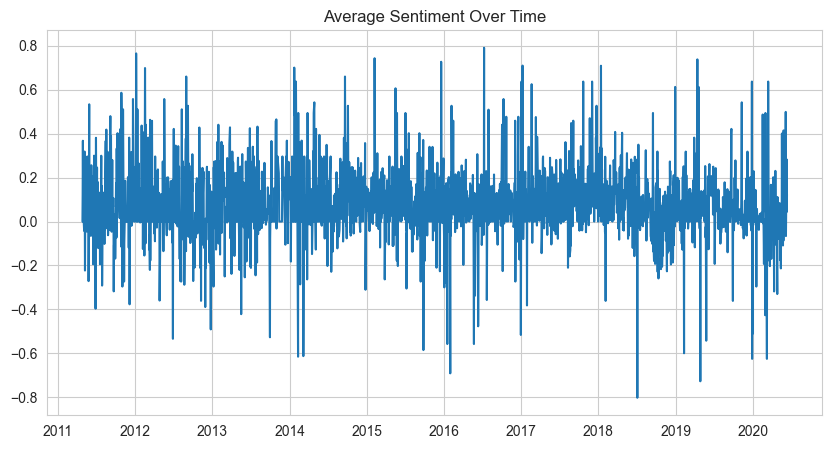

In [15]:
news['date'] = pd.to_datetime(news['date'], errors='coerce')

sentiment_daily = news.groupby(news['date'].dt.date)['sentiment'].mean()

plt.figure(figsize=(10,5))
plt.plot(sentiment_daily)
plt.title("Average Sentiment Over Time")
plt.show()

In [16]:
daily_counts = news.set_index('date').resample('D').size()
rolling = daily_counts.rolling(7).mean()

# Earnings / Event Seasonality

C:\Users\Dell\AppData\Local\Temp\ipykernel_14912\439295203.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news['month'] = news['date'].dt.to_period('M')


<Axes: xlabel='month'>

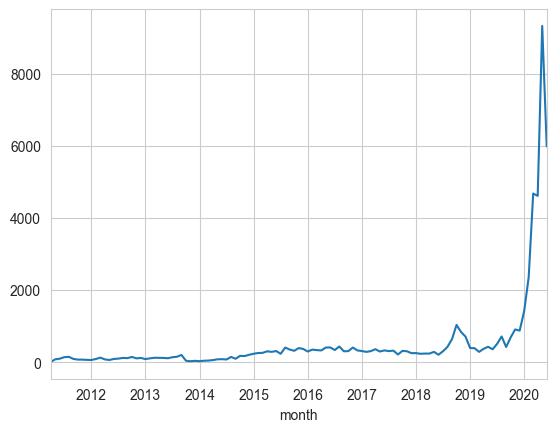

In [17]:
news['month'] = news['date'].dt.to_period('M')
monthly = news.groupby('month').size()
monthly.plot()

# Publisher vs Sentiment

<Axes: xlabel='publisher'>

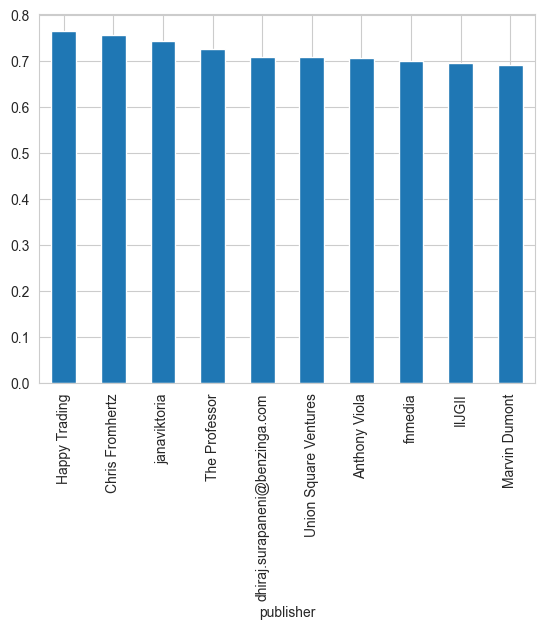

In [19]:
publisher_sentiment = news.groupby('publisher')['sentiment'].mean().sort_values(ascending=False).head(10)
publisher_sentiment.plot(kind='bar')


# Key Insights from Financial News Dataset

## Headline Lengths
- Average headline length is **73 characters**, median is **64**, indicating that most headlines are concise and focused.

## Most Common Words
- Frequently occurring words include general terms like *to*, *of*, *on*, *for*, *in*, *the*, and financial terms such as *stocks*, *shares*, *market*, *earnings*, *eps*, and *update*.
- This highlights both common language patterns and the **core financial topics** covered in the news.

## Financial Event Keywords
- High-frequency financial events include **earnings (86,626 occurrences)**, **upgrade (62,091)**, **downgrade (67,062)**, and **price target (47,634)**.
- Less frequent but notable events include **FDA approval (5,880–12,149)**, **acquisitions (8,911)**, and **mergers (5,621)**.
- These results indicate the dataset captures **critical financial events** that may impact stock performance.

## Publisher Contribution & Email Domains
- Most articles originate from **benzinga.com (7,937 articles)**, while other domains like gmail.com, andyswan.com, and investdiva.com contribute very few.
- This shows a **heavy concentration of news from a few primary sources**, which may influence sentiment patterns.

## Publisher vs. Keywords
- Different publishers focus on different topics:
    - Some, like **Abe Raymond**, emphasize market summaries and stock-related terms.
    - Others, like **Aaron Levitt**, frequently use general words (*the, to, in*) but also cover key financial terms.
- This reflects **variation in reporting style and topic coverage** across sources, which can affect text analysis and sentiment interpretation.

## Top 2-Word Phrases Insights

The most frequent 2-word phrases in headlines reveal the key topics driving financial news:

| Phrase | Count | Insight |
|--------|-------|---------|
| **price target** | 47,266 | Analysts frequently update stock price targets. |
| **stocks moving** | 40,072 | Headlines focus on significant stock movements. |
| **market update** | 33,089 | Broad market summaries are commonly reported. |
| **earnings scheduled** | 32,055 | Earnings announcements are major news triggers. |
| **initiates coverage** | 28,980 | Analysts initiating coverage is frequently highlighted. |
| **raises pt** | 27,206 | Price target increases are closely followed. |
| **companies trading** | 23,170 | Tracking active trading companies is common. |
| **trading higher** | 22,154 | Positive price movements are emphasized. |
| **adj eps** | 21,690 | Adjusted earnings per share is a common metric. |
| **premarket session** | 21,670 | Pre-market activity is often reported for early trading insights. |
| **vs est** | 21,449 | Performance compared to estimates is a frequent focus. |
| **benzingas upgrades** | 21,115 | Stock upgrades by Benzinga are often reported. |
| **q1 eps** | 20,704 | Quarterly earnings (Q1) are key financial metrics. |
| **q2 eps** | 20,258 | Quarterly earnings (Q2) coverage continues. |
| **q3 eps** | 20,043 | Similar focus on Q3 earnings. |
| **stocks hit** | 20,030 | Headlines highlight stocks reaching key levels. |
| **hit 52week** | 19,965 | Tracking 52-week highs/lows is common in news. |
| **trading lower** | 19,895 | Negative price movements are also tracked. |
| **q4 eps** | 19,846 | Q4 earnings are a regular reporting focus. |
| **new 52week** | 19,070 | New 52-week highs or lows are newsworthy events. |

### Key Takeaways
- Headlines are highly event-driven, focusing on earnings, stock ratings, and market movements.  
- Analysts’ actions and quarterly earnings dominate the reporting.  
- Phrases like *“price target”*, *“trading higher/lower”*, and *“52-week”* indicate that specific financial metrics and stock performance are central to financial news.  
- This analysis can help prioritize which news events to track for predicting stock price movements.
